I'm trying to predict survival based on age, sex, Pclass(Ticket class), 

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np


# Loading dataset

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

# Analysing Dataset

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data["Survived"].unique()

array([0, 1], dtype=int64)

In [7]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

# Cleaning data

In [8]:
backup = data.copy()

In [9]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [11]:
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [12]:
data['Sex'] = data['Sex'].map({'male': 0 , 'female':1})

In [13]:
data.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [14]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [15]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [18]:
data['Sex'].unique()

array([0, 1], dtype=int64)

In [19]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [20]:
data['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [21]:
data['Age'] = data['Age'].round(2)

In [22]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 29.7 , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [23]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [24]:
data.describe()

,Survived,Pclass,Sex,Age
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699293
std,0.486592,0.836071,0.477990,13.002015
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,22.000000
50%,0.000000,3.000000,0.000000,29.700000
75%,1.000000,3.000000,1.000000,35.000000
max,1.000000,3.000000,1.000000,80.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [26]:
data.info

<bound method DataFrame.info of      Survived  Pclass  Sex   Age
0           0       3    0  22.0
1           1       1    1  38.0
2           1       3    1  26.0
3           1       1    1  35.0
4           0       3    0  35.0
..        ...     ...  ...   ...
886         0       2    0  27.0
887         1       1    1  19.0
888         0       3    1  29.7
889         1       1    0  26.0
890         0       3    0  32.0

[891 rows x 4 columns]>

# Data Visualization

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

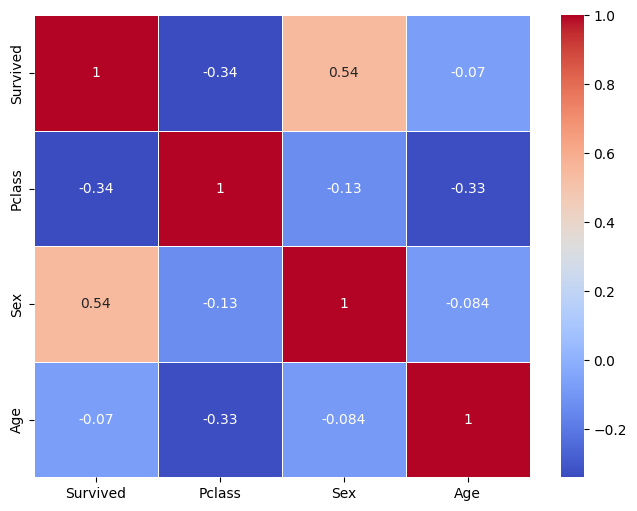

In [28]:
correlation_matrix = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()


# Lets now work on model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
x = data[['Pclass','Sex','Age']]
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.8100558659217877


In [31]:
import joblib

In [32]:
joblib.dump(model,'titanic_ml_model.pkl')
print("model saved successfully !")


model saved successfully !


In [33]:
loaded_model = joblib.load('titanic_ml_model.pkl')
new_data = [[1,0,21]]
column_names = ['Pclass', 'Sex', 'Age']  

new_data_df = pd.DataFrame(new_data, columns=column_names)

prediction = loaded_model.predict(new_data_df)
print(f"Prediction for the new data: {prediction[0]}")

Prediction for the new data: 1


# Evaluate 

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Evaluation matrices

print("Accuracy :",accuracy_score(y_test,y_pred))
print("confussion matrix :\n",confusion_matrix(y_test,y_pred))
print("Classification matrix :\n",classification_report(y_test,y_pred))

Accuracy : 0.8100558659217877
confussion matrix :
 [[91 14]
 [20 54]]
Classification matrix :
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [36]:
import pickle

with open('titanic_ml_model.pkl', 'rb') as f:
    model = pickle.load(f)

print(type(model))  # This should print something like: <class 'sklearn.ensemble.RandomForestClassifier'>


<class 'numpy.ndarray'>


In [37]:
model = joblib.load("heart.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'heart.pkl'